In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Select the normal class (e.g., sneaker = 7)
normal_class = 7

x_train_norm = x_train[y_train == normal_class]
x_test_norm = x_test[y_test == normal_class]
x_test_anom = x_test[y_test != normal_class]

print("Training normal samples:", x_train_norm.shape)
print("Testing normal samples:", x_test_norm.shape)
print("Testing anomaly samples:", x_test_anom.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training normal samples: (6000, 28, 28, 1)
Testing normal samples: (1000, 28, 28, 1)
Testing anomaly samples: (9000, 28, 28, 1)


In [ ]:
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.0002), loss='mae')

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = autoencoder.fit(
    x_train_norm, x_train_norm,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    shuffle=True
)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - loss: 0.3976 - val_loss: 0.1881
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1386 - val_loss: 0.0805
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0754 - val_loss: 0.0657
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0643 - val_loss: 0.0626
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 - val_loss: 0.0573
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0567 - val_loss: 0.0554
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0548 - val_loss: 0.0533
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0528 - val_loss: 0.0526
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0516 - val_loss: 0.0506
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0501 - val_loss: 0.0497
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0504 - val_loss: 0.0484
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0483 - va

In [ ]:
# Reconstruction
recon_norm = autoencoder.predict(x_test_norm)
recon_anom = autoencoder.predict(x_test_anom)

# Compute MAE for each image
err_norm = np.mean(np.abs(recon_norm - x_test_norm), axis=(1,2,3))
err_anom = np.mean(np.abs(recon_anom - x_test_anom), axis=(1,2,3))

print("Avg normal error:", np.mean(err_norm))
print("Avg anomaly error:", np.mean(err_anom))


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Avg normal error: 0.035360318
Avg anomaly error: 0.080485396


In [ ]:
threshold = np.mean(err_norm) + 2*np.std(err_norm)
print("Threshold:", threshold)


Threshold: 0.056637965


In [ ]:
y_true = np.concatenate([np.zeros_like(err_norm), np.ones_like(err_anom)])
y_pred = np.concatenate([err_norm, err_anom]) > threshold

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[ 958   42]
 [1713 7287]]
              precision    recall  f1-score   support

         0.0       0.36      0.96      0.52      1000
         1.0       0.99      0.81      0.89      9000

    accuracy                           0.82     10000
   macro avg       0.68      0.88      0.71     10000
weighted avg       0.93      0.82      0.86     10000



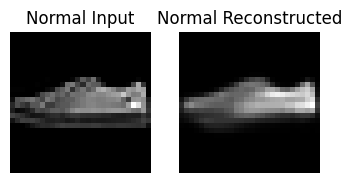

In [ ]:
idx = np.random.randint(0, len(x_test_norm))
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.title("Normal Input")
plt.imshow(x_test_norm[idx].squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Normal Reconstructed")
plt.imshow(recon_norm[idx].squeeze(), cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
print(len(x_train_norm))


6000


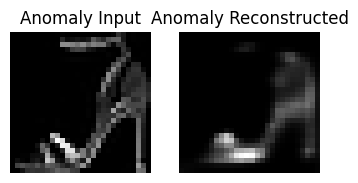

In [ ]:
idx = np.random.randint(0, len(x_test_anom))
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.title("Anomaly Input")
plt.imshow(x_test_anom[idx].squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Anomaly Reconstructed")
plt.imshow(recon_anom[idx].squeeze(), cmap='gray')
plt.axis('off')
plt.show()


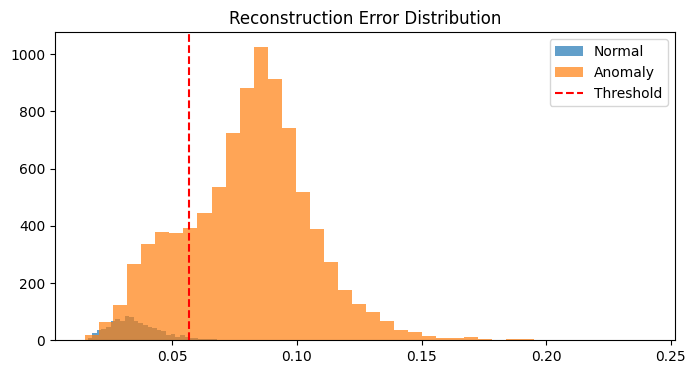

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(err_norm, bins=40, alpha=0.7, label="Normal")
plt.hist(err_anom, bins=40, alpha=0.7, label="Anomaly")
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = np.concatenate([np.zeros_like(err_norm), np.ones_like(err_anom)])
y_pred = np.concatenate([err_norm, err_anom]) > threshold

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[ 958   42]
 [1713 7287]]
              precision    recall  f1-score   support

         0.0       0.36      0.96      0.52      1000
         1.0       0.99      0.81      0.89      9000

    accuracy                           0.82     10000
   macro avg       0.68      0.88      0.71     10000
weighted avg       0.93      0.82      0.86     10000

